# Accuracy analysis

* This kernel is written to visualise two datasets from kaggle:
    1. [Pima Indian Diabetes](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
    2. [Graduate University Dataset](https://www.kaggle.com/mohansacharya/graduate-admissions/)

    Here I am proposing a very simple accuracy metrics which is able to calculate accuracy of most type of numerical output.
                        accuracy = correct_predictions(within a margin error)/total_predictions

Yes it is the simplest form for accuracy metrics but the reason of proposal to have this metrics as universal, will be studied below.

* But what this prediction metrics do is get the correct values within an error of margin that is tolerable and give what is there percentage.

* For classification problems this simply becomes an [sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) metric, but this same metric can not be used for all others numerical prediction, such as regression problems.

* For regression model analysts tend to use r2 score because it provides pretty sweet high accuracy values that everyone want to see. But this r2 score, although good for comparing models is not good enough for actual performace evaluation of a model.

* Most other metrics for accuracy can not be applied to other type of models. But the said metric can be applied to all types of model albiet only to model with numerical prediction.

* This metric is quite helpfull in analysing and knowing about the predictions, which is not possible for r2 score and many other such metrics.

#### NOTE
* Many might be using the metric that I am going to use here already, in some form or other, I got the knowledge of this metric from my mentor and considered it worth sharing.

## Motivation

* How important is this metric more than others for analysis will be the reason for this kernel existance.

* For the Graduate Admission dataset I saw quite a number of kernels providing high accuracy but all these are accounted with r2 score, none of them even tried it with an adjusted r2 score for better performance analysis.

* Few even used RMSE value to calculate accuracy.

Later, maybe, a kernel for time series analysis will also be created for showing its realtive universility.

## Dataset

* Both the dataset were taken from kaggle's dataset corpus for which link are provided.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, LinearSVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, f1_score, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier, MLPRegressor

## Functions
* Return all different model here.
* Models are along with parameters so any relevant change be easy

In [2]:
def get_models():
	''' Return all different model here.
    Models are along with parameters so any relevant change be easy'''
	models = [
				 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
							max_features=None, max_leaf_nodes=None,
							min_impurity_decrease=0.0, min_impurity_split=None,
							min_samples_leaf=1, min_samples_split=2,
							min_weight_fraction_leaf=0.0, presort=False,
							random_state=None, splitter='best'),

				 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
						   intercept_scaling=1, l1_ratio=None, max_iter=100,
						   multi_class='warn', n_jobs=None, penalty='l2',
						   random_state=None, solver='warn', tol=0.0001, verbose=0,
						   warm_start=False),

				 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
							metric_params=None, n_jobs=None, n_neighbors=5, p=2,
							weights='uniform'),

				 LinearSVR(C=4.0, dual=True, epsilon=0.0, fit_intercept=True,
						intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
						random_state=None, tol=0.00001, verbose=0),\

				 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),\

				 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
						  max_features='auto', max_leaf_nodes=None,
						  min_impurity_decrease=0.0, min_impurity_split=None,
						  min_samples_leaf=1, min_samples_split=2,
						  min_weight_fraction_leaf=0.0, n_estimators=10,
						  n_jobs=None, oob_score=False, random_state=None,
						  verbose=0, warm_start=False),\

				 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
							metric_params=None, n_jobs=None, n_neighbors=2, p=2,
							weights='uniform'),\

				 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
						  max_leaf_nodes=None, min_impurity_decrease=0.0,
						  min_impurity_split=None, min_samples_leaf=1,
						  min_samples_split=2, min_weight_fraction_leaf=0.0,
						  presort=False, random_state=None, splitter='best'),\

				 GaussianNB(priors=None, var_smoothing=1e-06),\

				 MLPClassifier(hidden_layer_sizes=(200, ), activation='relu', solver='adam',
								 alpha=0.0001, batch_size='auto', learning_rate='constant', 
								 learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True,
								 random_state=None, tol=0.0001, verbose=False, warm_start=False, 
								 momentum=0.7, nesterovs_momentum=True, early_stopping=False, 
								 validation_fraction=0.4, beta_1=0.9, beta_2=0.999, epsilon=1e-06, n_iter_no_change=10),

				 MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
								 beta_2=0.999, early_stopping=False, epsilon=1e-08,
								 hidden_layer_sizes=(100,), learning_rate='constant',
								 learning_rate_init=0.001, max_iter=2000, momentum=0.9,
								 n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
								 random_state=None, shuffle=True, solver='adam', tol=0.0001,
								 validation_fraction=0.1, verbose=False, warm_start=False),
				 ]

	return models

* Returns index of columns that may be dropped if are un-correlated.

In [3]:
def get_uncorr_ind(df):
	'''Calculate correlation matrix and choose columns on its basis'''

	corr_matrix = df.corr()["Outcome"]
	corr_ind_drop = []
	for i in range(len(df.columns)):
		if (corr_matrix.values[i] < 0.1):
			corr_ind_drop.append(i)

	return corr_ind_drop

* Visualize the data

In [4]:
def visualization(df):
	data = df
	print(df.head(10))
	print('\n')
	print("Correlation Matrix")
	sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
	plt.show()
	print("Correlation for Outcome")
	print(df.corr()['Outcome'])
	print('\n')
	print("No. of Unique values in different columns")
	print((df.nunique()))

	sns.countplot(x="Outcome",data=data)
	plt.show()

    # Have only data whose outcome is 1
	df_h = df[~(df["Outcome"] == 0)]
	df = data
    # Have only data whose outcome is 0
	df_nh = df[~(df["Outcome"] == 1)]

    # Extract feature names from columns
	feat = [ind for ind in (data.columns)]

	print('\n')
	print('Columns as Features: {}'.format(feat))
	print('\n')
	print('Column to predict : {}'.format(feat[8]))

    # Age vs Features plot
	print('\n')
	plt.figure(figsize=(18,18))
	i = 1
	for fea in feat[:len(feat)]:
		if(fea != "Age"):
			plt.subplot(3,3,i)
			plt.tight_layout()
			x = plt.scatter(df_h[fea], df_h["Age"], s=15)
			y = plt.scatter(df_nh[fea], df_nh["Age"], s=15, color='red')
			plt.legend((x,y), ("Do have Diab", "Do not have Diab"))
			plt.title('Age vs Features')
			plt.xlabel(fea)
			plt.ylabel("Age")
			i = i + 1
	plt.show()

    # Features plot
	print('\n')
	plt.figure(figsize=(18,18))
	i = 1
	for fea in feat[:len(feat)-1]:
		plt.subplot(3,3,i)
		plt.tight_layout()
		x = plt.scatter(df_h[fea], range(len(df_h["Age"])), s=15)
		y = plt.scatter(df_nh[fea], range(len(df_nh["Age"])), s=15)
		plt.legend((x,y), ("Do have Diab", "Do not have Diab"))
		plt.title(fea)
		plt.xlabel(fea)
		plt.ylabel("Y-Axis")

		i = i + 1
	plt.show()

    # Feature frequency plots
	print('\n')
	i = 1
	for fea in feat[:len(feat)-1]:
		plt.subplot(3,3,i)
		plt.tight_layout()
		if((fea == "SkinThicknes") or (fea == "Insulin")):
			df__ = df_nh
			df__[~(df__[fea]==0)][fea].plot(kind = 'hist',bins = 200,figsize = (18,18), color='red')
			df__ = df_h
			df__[~(df__[fea]==0)][fea].plot(kind = 'hist',bins = 400,figsize = (18,18))
		else:
			df_nh[fea].plot(kind = 'hist',bins = 400,figsize = (18,18), color='red')
			df_h[fea].plot(kind = 'hist',bins = 600,figsize = (18,18))

		plt.title(fea)
		plt.xlabel(fea)
		plt.ylabel("Frequency")
		i = i + 1
	plt.show()

In [5]:
# Get Data
data = pd.read_csv('../Pima_Ind_Diab_Project/diabetes.csv')

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

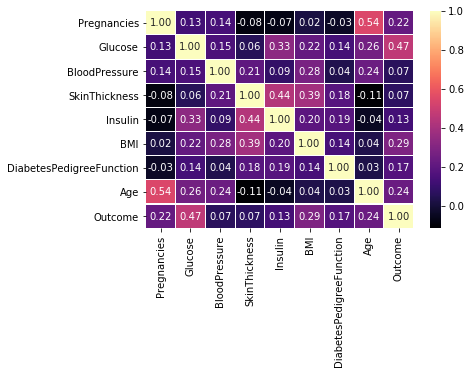

Correlation for Outcome
Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64


No. of Unique values in different columns
Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


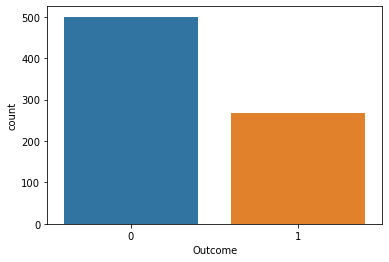



Columns as Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


Column to predict : Outcome




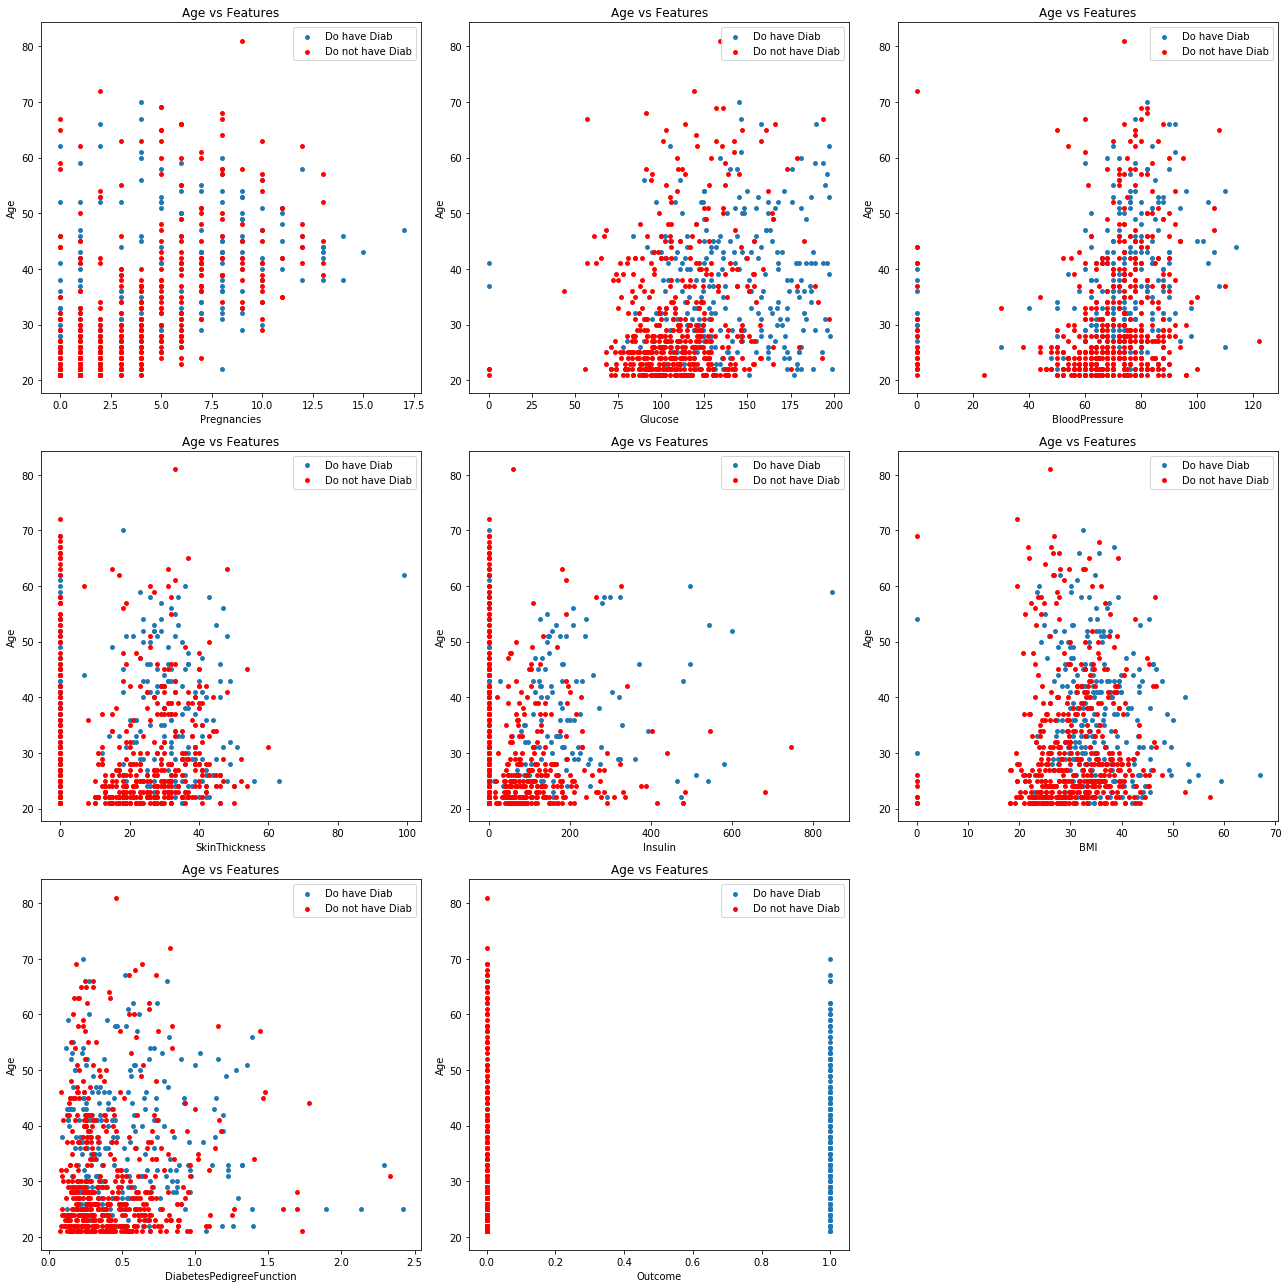

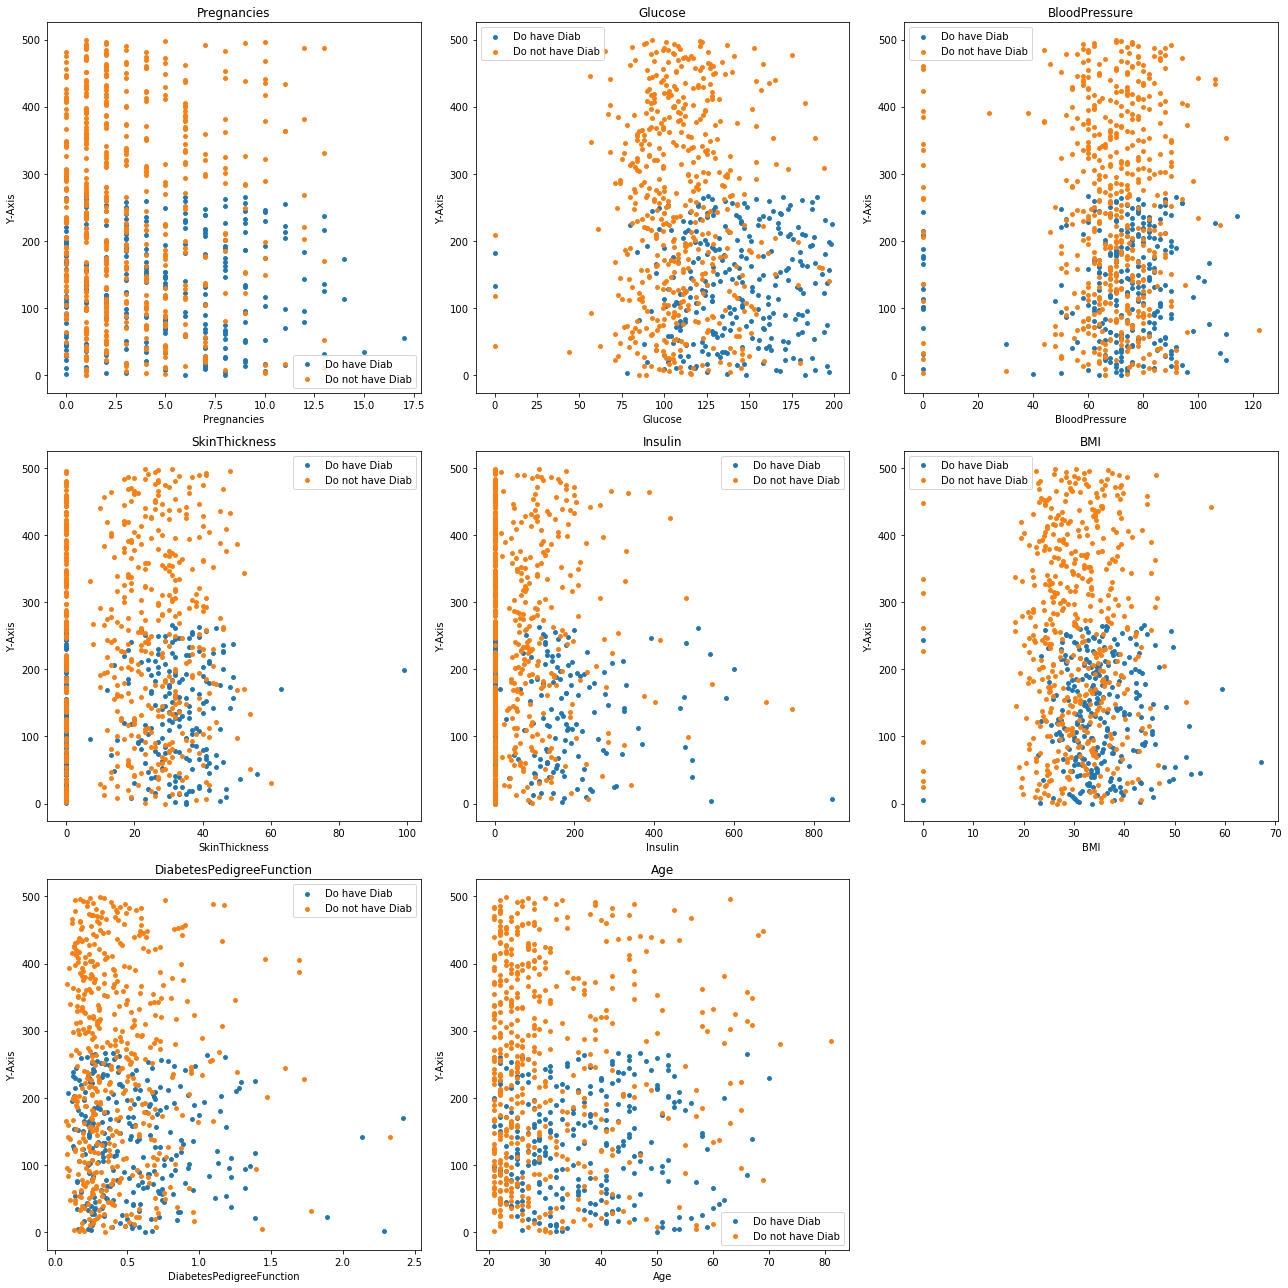

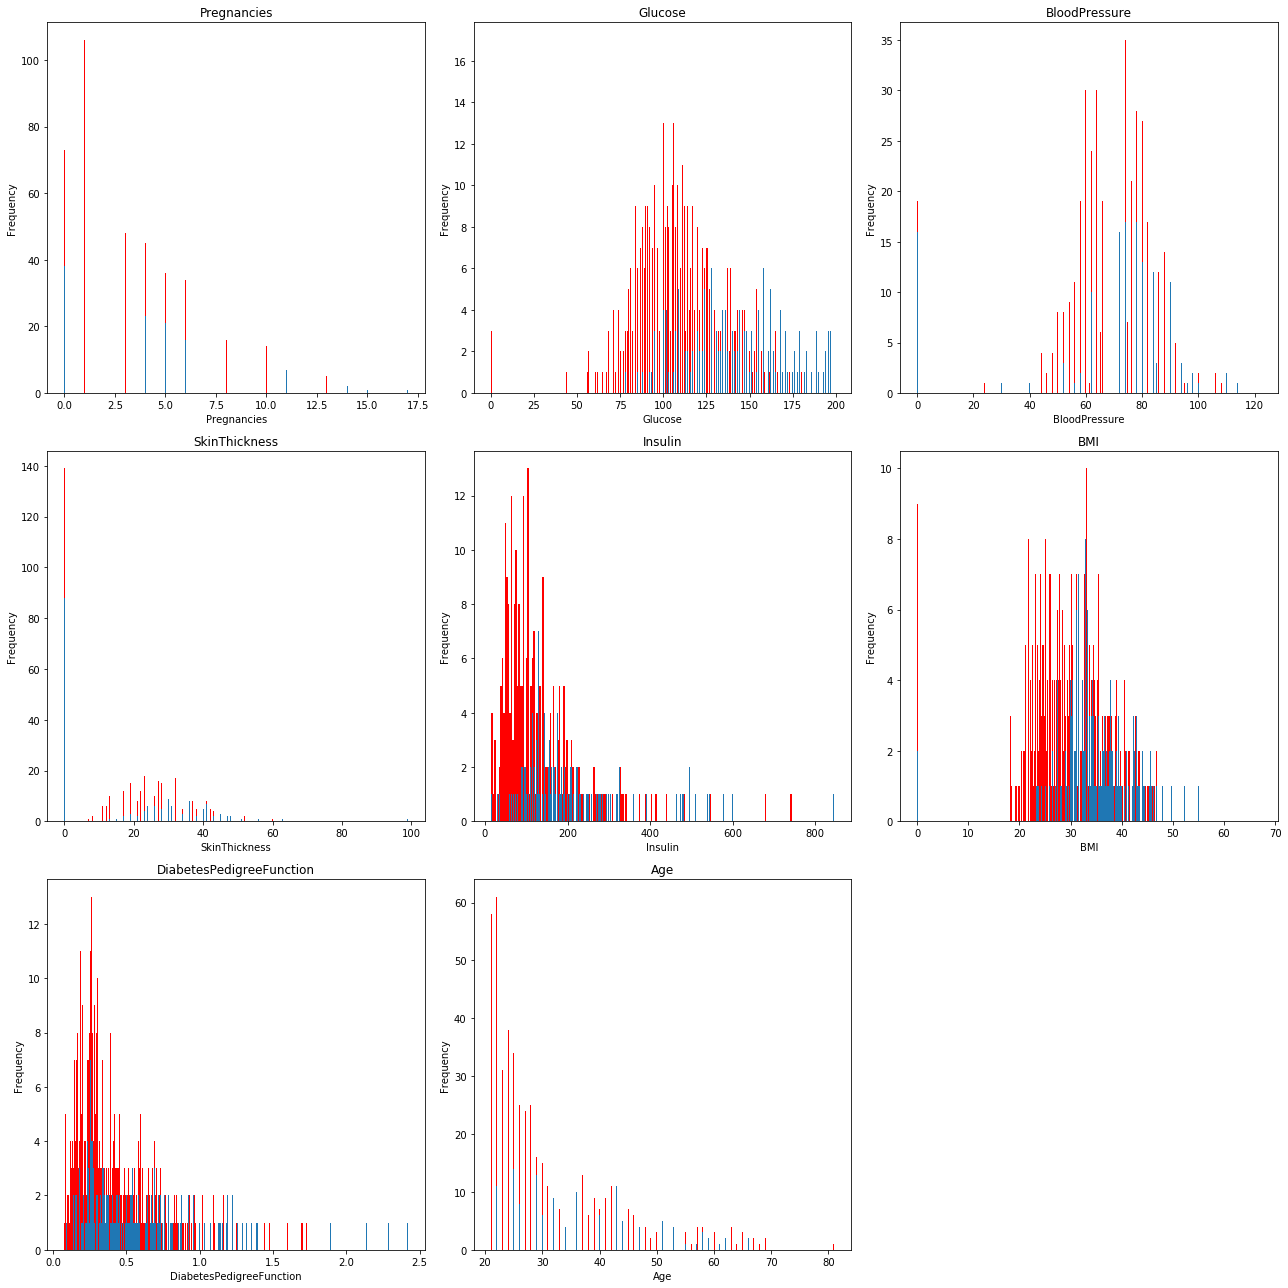

In [6]:
# Visualize data and its analysis
visualization(data)

In [7]:
## Data Cleaning
# Remove all rows with BloodPressure, Age and BMI values zero as that is not possible
data = data[~(data["BloodPressure"] == 0)]
data = data[~(data["BMI"] == 0)]
data = data[~(data["Age"] == 0)]
data = data[~(data["Glucose"] == 0)]

In [8]:
# Get index for least correlated column
corr_ind_drop = get_uncorr_ind(data)

# Drop least correlated columns
data.drop(data.columns[corr_ind_drop], inplace=True, axis=1)

# Get number of independant variables, drop the dependant variable
num_charac = len(data.columns) - 1
Y = data["Outcome"]
data.drop(["Outcome"],axis=1,inplace = True)

# Split dataset into train and test, with randomness
x_train, x_test, y_train, y_test = train_test_split(data, Y, test_size = 0.3, random_state = 10)

# normalization
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

In [9]:
# Get differnet Regressive models
models = get_models()

#### The following are three cases with:
    Case : 1
        No change in Insulin column.
    Case : 2
        Drop all rows with Insulin = 0
    Case : 3
        Remove Insulin column.
* This was done as insulin of a person as zero can be the case of Type I diabetes, but it can also be the case of not available values. No information was provided so I decided to go with these three cases. Though result are pretty much similar but in Case : 2 a lot of data is dropped. So caution must be taken.

In [10]:
# CASE : 1

data_2 = data
col_df = []
accu_martix = []
mse_matrix = []

for mod in models:
	# print(mod.split('(')[0])
	model = mod.fit(x_train, y_train)
	y_hat = model.predict(x_test)
	y_hat_ = y_hat

	# Encoding
	for y in range(len(y_hat_)) :
		if(y_hat_[y] < 0.5):
			y_hat[y] = 0
		else:
			y_hat[y] = 1

	accuracy = (np.abs((y_hat) - (y_test)) < 1e-2).mean()

	# print(str(mod).split('(')[0])
	# print(y_hat)
	accu_martix.append(accuracy)
	
	mseloss = mean_squared_error(y_hat, y_test)
	mse_matrix.append(mseloss)

	col_df.append(str(mod).split('(')[0])

	
acc_df = pd.DataFrame(data=np.array([accu_martix]), columns=col_df[:])
acc_df = acc_df.T
acc_df.columns = ["Accuracy"]
print(acc_df)
print('\n')
los_df = pd.DataFrame(data=np.array([mse_matrix]), columns=col_df[:])
los_df = los_df.T
los_df.columns = ["MSELoss"]
print(los_df)

                        Accuracy
DecisionTreeClassifier  0.733945
LogisticRegression      0.770642
KNeighborsClassifier    0.729358
LinearSVR               0.770642
LinearRegression        0.788991
RandomForestRegressor   0.770642
KNeighborsRegressor     0.665138
DecisionTreeRegressor   0.692661
GaussianNB              0.779817
MLPClassifier           0.811927
MLPRegressor            0.784404


                         MSELoss
DecisionTreeClassifier  0.266055
LogisticRegression      0.229358
KNeighborsClassifier    0.270642
LinearSVR               0.229358
LinearRegression        0.211009
RandomForestRegressor   0.229358
KNeighborsRegressor     0.334862
DecisionTreeRegressor   0.307339
GaussianNB              0.220183
MLPClassifier           0.188073
MLPRegressor            0.215596


/usr/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [11]:
# CASE : 2

data_2 = data_2[~(data_2["Insulin"] == 0)]

col_df = []
accu_martix = []
mse_matrix = []

for mod in models:
	model = mod.fit(x_train, y_train)
	y_hat = model.predict(x_test)
	y_hat_ = y_hat

	# Encoding
	for y in range(len(y_hat_)) :
		if(y_hat_[y] < 0.5):
			y_hat[y] = 0
		else:
			y_hat[y] = 1

	accuracy = (np.abs((y_hat) - (y_test)) < 1e-2).mean()
	accu_martix.append(accuracy)
	
	mseloss = mean_squared_error(y_hat, y_test)
	mse_matrix.append(mseloss)

	col_df.append(str(mod).split('(')[0])
	
acc_df = pd.DataFrame(data=np.array([accu_martix]), columns=col_df[:])
acc_df = acc_df.T
acc_df.columns = ["Accuracy"]
print(acc_df)
print('\n')
los_df = pd.DataFrame(data=np.array([mse_matrix]), columns=col_df[:])
los_df = los_df.T
los_df.columns = ["MSELoss"]
print(los_df)

                        Accuracy
DecisionTreeClassifier  0.711009
LogisticRegression      0.770642
KNeighborsClassifier    0.729358
LinearSVR               0.770642
LinearRegression        0.788991
RandomForestRegressor   0.747706
KNeighborsRegressor     0.665138
DecisionTreeRegressor   0.692661
GaussianNB              0.779817
MLPClassifier           0.811927
MLPRegressor            0.788991


                         MSELoss
DecisionTreeClassifier  0.288991
LogisticRegression      0.229358
KNeighborsClassifier    0.270642
LinearSVR               0.229358
LinearRegression        0.211009
RandomForestRegressor   0.252294
KNeighborsRegressor     0.334862
DecisionTreeRegressor   0.307339
GaussianNB              0.220183
MLPClassifier           0.188073
MLPRegressor            0.211009


In [12]:
# CASE : 3

data_2 = data
data_2.drop(["Insulin"], inplace=True, axis=1)

col_df = []
accu_martix = []
mse_matrix = []

for mod in models:
	model = mod.fit(x_train, y_train)
	y_hat = model.predict(x_test)
	y_hat_ = y_hat

	# Encoding
	for y in range(len(y_hat_)) :
		if(y_hat_[y] < 0.5):
			y_hat[y] = 0
		else:
			y_hat[y] = 1

	accuracy = (np.abs((y_hat) - (y_test)) < 1e-2).mean()
	accu_martix.append(accuracy)
	
	mseloss = mean_squared_error(y_hat, y_test)
	mse_matrix.append(mseloss)

	col_df.append(str(mod).split('(')[0])
	
acc_df = pd.DataFrame(data=np.array([accu_martix]), columns=col_df[:])
acc_df = acc_df.T
acc_df.columns = ["Accuracy"]
print(acc_df)
print('\n')
los_df = pd.DataFrame(data=np.array([mse_matrix]), columns=col_df[:])
los_df = los_df.T
los_df.columns = ["MSELoss"]
print(los_df)

                        Accuracy
DecisionTreeClassifier  0.701835
LogisticRegression      0.770642
KNeighborsClassifier    0.729358
LinearSVR               0.770642
LinearRegression        0.788991
RandomForestRegressor   0.715596
KNeighborsRegressor     0.665138
DecisionTreeRegressor   0.674312
GaussianNB              0.779817
MLPClassifier           0.788991
MLPRegressor            0.784404


                         MSELoss
DecisionTreeClassifier  0.298165
LogisticRegression      0.229358
KNeighborsClassifier    0.270642
LinearSVR               0.229358
LinearRegression        0.211009
RandomForestRegressor   0.284404
KNeighborsRegressor     0.334862
DecisionTreeRegressor   0.325688
GaussianNB              0.220183
MLPClassifier           0.211009
MLPRegressor            0.215596


/usr/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#### Observations
* From the result one can observe that accuracy here is (1 - MSELoss). Since MSELoss was calculated after encoding the results.
* The accuracy value represent the number of right prediction over total prediction.
* For the classification algorithm confusion matrix should also be used for further analysis but thats not relevant here and hence is skipped.
* MSELoss is high for a prediction of 0 and 1, but keep in mind that it was calculated after encoding.
* The MLPClassifier(Multilayer Perceptron) seems to get the best result in all 3 cases.

So far the accuracy metric proposed haven't shown anything special, we can get the same accuracy with [accuray_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) from scikit learn library

### Next will be analysis of Graduate Admission dataset from kaggle

In [13]:
def get_models():
	models = [
				 LinearSVR(C=4.0, dual=True, epsilon=0.0, fit_intercept=True,
	          			intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
	          			random_state=None, tol=0.00001, verbose=0),\

				 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),\

				 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
	                      max_features='auto', max_leaf_nodes=None,
	                      min_impurity_decrease=0.0, min_impurity_split=None,
	                      min_samples_leaf=1, min_samples_split=2,
	                      min_weight_fraction_leaf=0.0, n_estimators=10,
	                      n_jobs=None, oob_score=False, random_state=None,
	                      verbose=0, warm_start=False),\

				 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
	                    	metric_params=None, n_jobs=None, n_neighbors=2, p=2,
	                    	weights='uniform'),\

				 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
	                      max_leaf_nodes=None, min_impurity_decrease=0.0,
	                      min_impurity_split=None, min_samples_leaf=1,
	                      min_samples_split=2, min_weight_fraction_leaf=0.0,
	                      presort=False, random_state=None, splitter='best'),\

				 MLPRegressor(hidden_layer_sizes=(2000, ), activation='relu', solver='adam',
				 				 alpha=0.0001, batch_size='auto', learning_rate='constant', 
				 				 learning_rate_init=0.001, power_t=0.5, max_iter=3000, shuffle=True,
				 				 random_state=None, tol=0.0001, verbose=False, warm_start=False, 
				 				 momentum=0.7, nesterovs_momentum=True, early_stopping=False, 
				 				 validation_fraction=0.3, beta_1=0.9, beta_2=0.999, epsilon=1e-08,
				 				 n_iter_no_change=10),
				 ]

	return models


def get_uncorr_ind(df):
	'''Calculate correlation matrix and choose columns on its basis'''

	corr_matrix = df.corr()["Chance of Admit"]
	corr_ind_drop = []
	for i in range(len(df.columns)):
		if (corr_matrix.values[i] < 0.5):
			corr_ind_drop.append(i)

	return corr_ind_drop


def visualization(df):
	data = df
	print(df.head())
	print('\n')
	print("correlation Matrix")
	sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
	plt.show()
	print('\n')
	print("correlation for Chance of Admit")
	print(df.corr()['Chance of Admit'])
	print('\n')
	print("No. of Unique values in different columns")
	print((df.nunique()))

	print('\n')
	sns.countplot(x="Chance of Admit",data=data)
	plt.show()

	df_h = df[~(df["Chance of Admit"] == 0)]
	df = data
	df_nh = df[~(df["Chance of Admit"] == 1)]


	feat = [ind for ind in (data.columns)]

	print('\n')
	print('Columns as Features: {}'.format(feat))
	print('\n')
	print('Column to predict : {}'.format(feat[8]))

	print('\n')
	plt.figure(figsize=(18,18))
	i = 1
	for fea in feat[:len(feat)]:
		if(fea != "Chance of Admit"):
			plt.subplot(3,3,i)
			plt.tight_layout()
			plt.scatter(df_h[fea], df_h["Chance of Admit"], s=3)
			plt.scatter(df_nh[fea], df_nh["Chance of Admit"], s=3, color='red')
			plt.title(fea)
			plt.xlabel(fea)
			plt.ylabel("Chance of Admit")
			i = i + 1
	plt.show()

	return

In [14]:
# Data loading
data = pd.read_csv('../Admis_Project/Admission_Predict.csv')

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65  


correlation Matrix


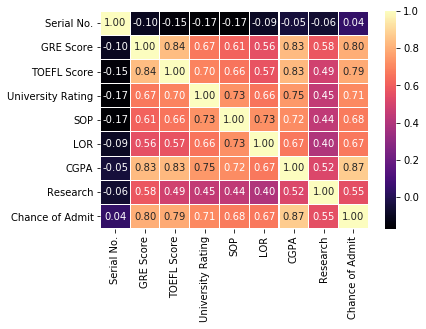



correlation for Chance of Admit
Serial No.           0.042336
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
CGPA                 0.873289
Research             0.553202
Chance of Admit      1.000000
Name: Chance of Admit, dtype: float64


No. of Unique values in different columns
Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64




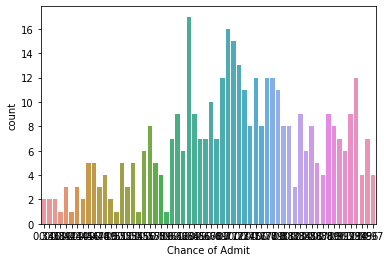



Columns as Features: ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']


Column to predict : Chance of Admit




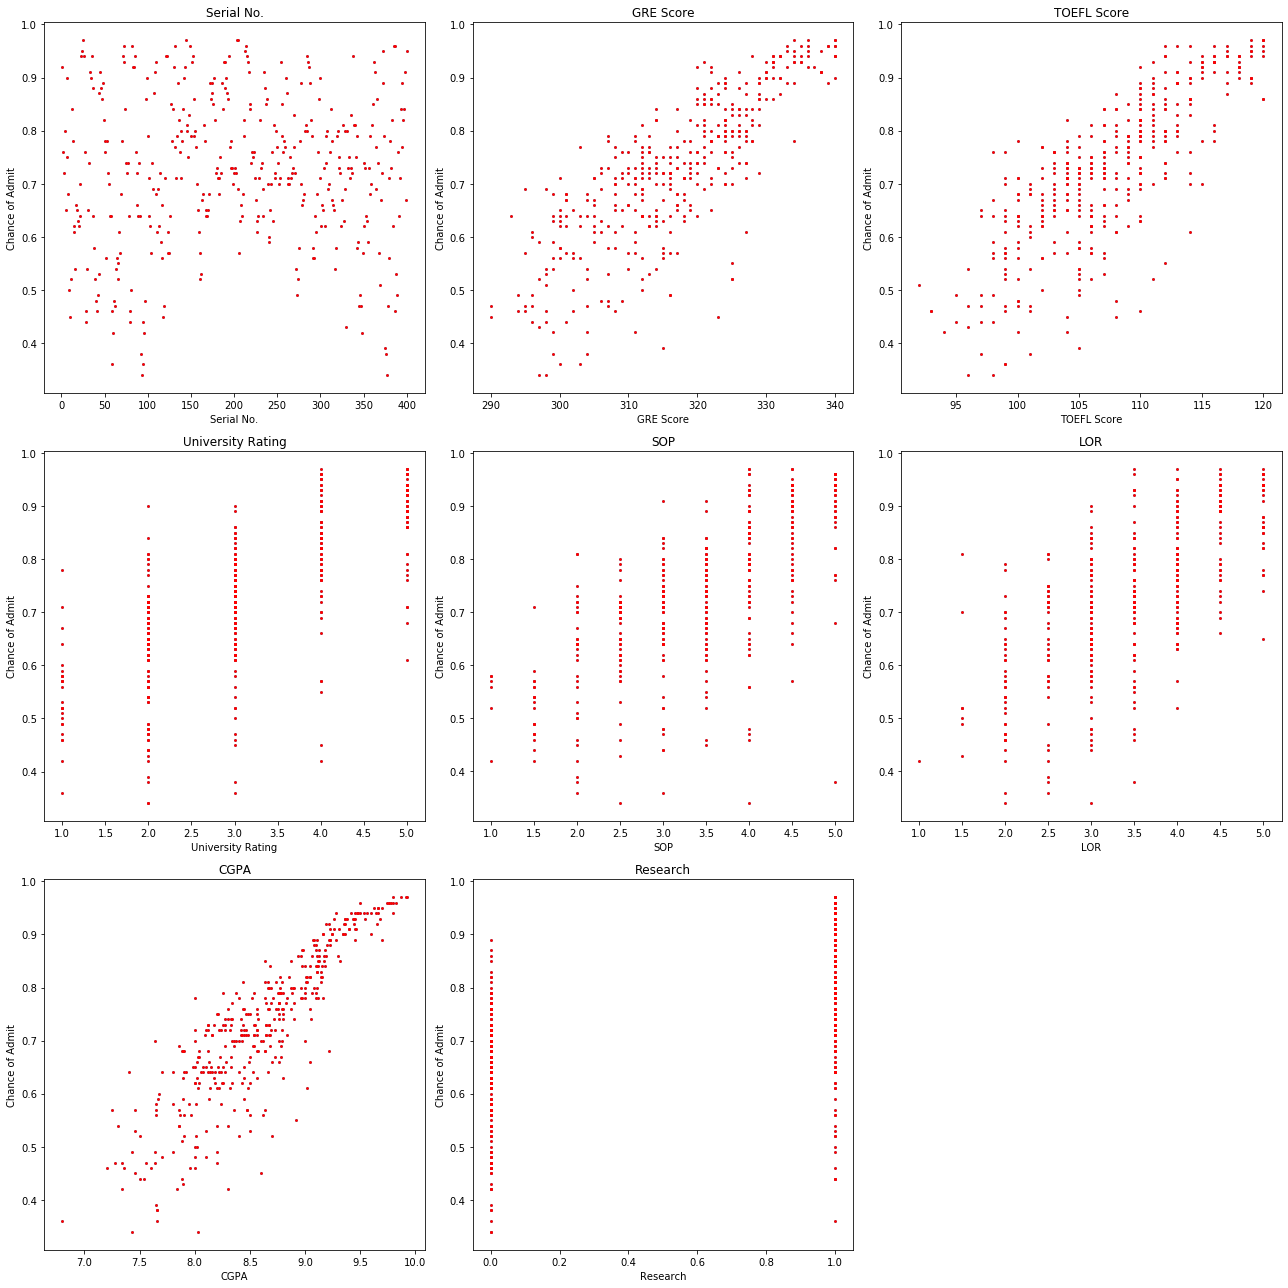

In [15]:
# Data visualisation
visualization(data)

In [16]:
# Get index for least correlated column
corr_ind_drop = get_uncorr_ind(data)
print(corr_ind_drop)

# Drop least correlated columns
data.drop(data.columns[corr_ind_drop], inplace=True, axis=1)

# Get number of independant variables, drop the dependant variable
num_charac = len(data.columns) - 1
Y = data["Chance of Admit"]
data.drop(["Chance of Admit"], axis=1, inplace = True)

[0]


In [17]:
# Split dataset into train and test, with randomness
x_train, x_test, y_train, y_test = train_test_split(data, Y, test_size = 0.20, random_state = 42)

# normalization
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

In [18]:
# Get differnet Regressive models
models = get_models()

/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


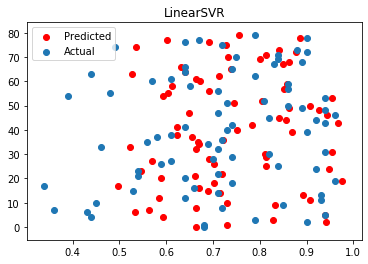

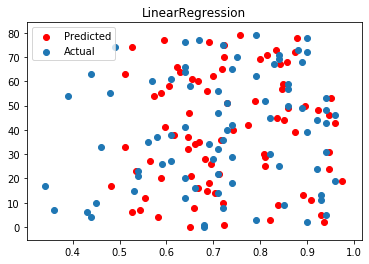

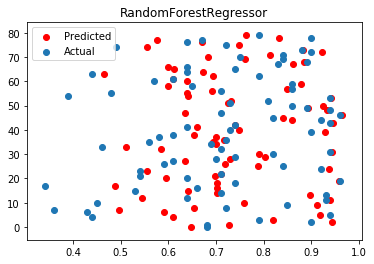

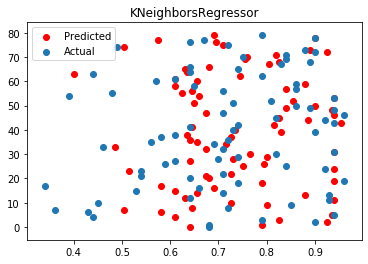

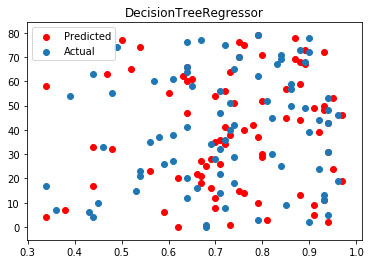

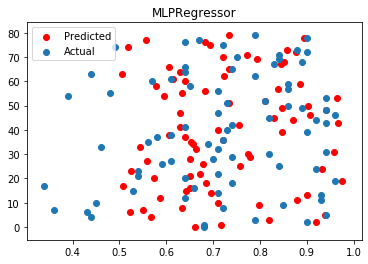

In [19]:
data_2 = data
col_df = []
accu_martix_7 = []
accu_martix_5 = []
accu_martix_3 = []
adj_r2_matrix = []
r2_matrix = []
mse_matrix = []

for model in models:

	model.fit(x_train, y_train)
	y_hat = model.predict(x_test)
	y_h_p = plt.scatter(y_hat, range(len(y_hat)), color='red')
	y_p = plt.scatter(y_test, range(len(y_hat)))
	plt.legend((y_h_p, y_p),("Predicted", "Actual"))
	plt.title(str(model).split('(')[0])
	plt.show()

	r2_matrix.append(r2_score(y_test, y_hat))

	accuracy = (np.abs((y_hat) - (y_test)) < 5e-2).mean()

	adj_r2 = (1 - r2_score(y_test, y_hat)) * (len(y_test)/(len(y_test) - 1))

	accu_martix_5.append(accuracy)
	accu_martix_7.append((np.abs((y_hat) - (y_test)) < 7e-2).mean())
	accu_martix_3.append((np.abs((y_hat) - (y_test)) < 3e-2).mean())
	adj_r2_matrix.append(1-adj_r2)

	mseloss = sqrt(mean_squared_error(y_test, y_hat))
	mse_matrix.append(mseloss)

	col_df.append(str(model).split('(')[0])


In [20]:
print('\n')
acc_df = pd.DataFrame(data=[accu_martix_5, adj_r2_matrix, mse_matrix, r2_matrix, accu_martix_3, accu_martix_7], columns=col_df[:])
acc_df = acc_df.T
acc_df.columns = ["Accuracy_5", "Adjusted R2", "RMSELoss", "R2 Score", "Accuracy_3", "Accuracy_7"]
print(acc_df)



                       Accuracy_5  Adjusted R2  RMSELoss  R2 Score  \
LinearSVR                  0.7000     0.803211  0.070839  0.805671   
LinearRegression           0.7000     0.818945  0.067949  0.821208   
RandomForestRegressor      0.6000     0.746413  0.080415  0.749583   
KNeighborsRegressor        0.5875     0.729675  0.083027  0.733054   
DecisionTreeRegressor      0.5750     0.602411  0.100691  0.607381   
MLPRegressor               0.6000     0.805898  0.070354  0.808324   

                       Accuracy_3  Accuracy_7  
LinearSVR                  0.5000      0.8000  
LinearRegression           0.4500      0.7875  
RandomForestRegressor      0.4375      0.7375  
KNeighborsRegressor        0.4125      0.7125  
DecisionTreeRegressor      0.4000      0.7125  
MLPRegressor               0.4375      0.7875  


### Analysis
* One can observe that R2 Score ,i.e, r_square values seems pretty good for different regressor except for KNeighboursRegressor and DecisionTreeRegressor. But the accuracy from the proposed accuracy metric seem bad.

* The accuracy of all these models is pretty bad actually than what r2_score make you believe, the best performing model by both the metric is LinearRegression but that accuracy level was achieved with a tolerant error of 0.05 ,i.e, 5%.

* R2 score value only increase with increase in number of test samples it never decreases. So with increased sample size the evaluation will be far from correct. But this can easily be rectified by use of Adjusted R2 score, and large number of data point does not seem to be the problem.

* As one start decreasing error tolerance the result will become poor even increasing the error tolerance does increase the accuracy but one can analize that the models performed poor.

* As one can see if error tolerance is decreased to 3% LinearSVR model become the best of them even increasing the tolerance level show LinearSVR is better.

* One important point that must be seen with proposed metric is that one can easily analize the result within different error tolerance and get the information about different distribution of result accuracy. Like how many are within error tolerance of 1%, 2% and so on, and can further check there model.
    * Example
        For LinearRegression model 45% prediction are within 3% error tolerance, 25% prediction have error>3% but <5% and 8.75% prediction have error>5% but <7%

* So as far as the accuracy goes of so many models none provide a satisfying result, 95% accuray with 3% error tolerance(thats what I think).

* This [article](https://people.duke.edu/~rnau/rsquared.htm) shows there are quite a number of things to consider before accepting a high R2 score value.

* The accuracy becomes similar when error tolerance is taken as 7% but is this OK, that depends on the analyst whether for him/her this error is acceptable or not.

* Do not use MSE values rather use RMSE values.
    * RMSE values show error in same units as the predicted value compared to the MSE.
    * For optimisation both are acceptable and interchangable(obvious).
    * Subtracting RMSE from 100 does not provide accuracy, not even in this case(Graduation Admission dataset).
    * RMSE provides the amount of error on average(name specifies this) respective to actual prediction, so for LinearRegression, 0.0679 or 6.79%(since dependant variable is also percentage value) error is there respective to values calculated by the model.
    * This is also in line with accuracy which 7% error tolerance provides. 

#### Important Note
* The MSELoss value does go along with what r2_score results are and not with the proposed metric(not exactly), but the reason for writing this kernel was not to discourage use of these metrics as these are standard and used by many. But further evaluation of models is always required and that too in easy and understandable way, which the proposed metric provide.
* What if the prediction values were in range of millions(I came across such a dataset and normalising the value was not a good idea for prediction purposes) ? Try for such data and yes it is easily applicable there too.
* One should try data from other fields too, such as Stock Market, accuracy measurement there works on same principle but will seem totally different. One could search for MAPE and sMAPE.


#### From 2 dataset :
    1. Pima Indian Diabetes
    2. Graduate Admission
It is clear that the metric studied here provides better analysis of regression problems than other more common metrics.


Do go to the link for the article provided in the analysis section, there is a lot to know but this kernel is already
pretty large now.